In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as c
import random
%matplotlib inline

In [2]:
def rand_type(initial_type_ratio):
    val = random.random()
    if val < initial_type_ratio:
        return 'elliptical'
    return 'spiral'

def gravity_force(galaxy_one, galaxy_two):
    G = c.G
    dist = galaxy_one.distance(galaxy_two)
    force = (galaxy_one.mass * galaxy_two.mass)/dist**2
    angle = galaxy_one.angle(galaxy_two)
    xforce = force * np.cos(angle)
    yforce = force * np.sin(angle)
    return xforce, yforce

class Galaxy:
    
    def __init__(self, id_, x, y, mass, gal_type):
        self.id_ = id_
        self.x = x
        self.y = y
        self.vx = 0
        self.vy = 0
        self.mass = mass
        self.gal_type = gal_type
        self.active = True
        self.in_visible_universe = True
        if gal_type == 'elliptical':
            self.color = 'r'
        else:
            self.color = 'b'
    
    def __repr__(self):
        return f'Galaxy #{self.id_}:\n\t mass: {self.mass}\n\t coordinates\n\t ({self.x}, {self.y})\n\t velocity: ({self.vx}, {self.vy})\n\t type: {self.gal_type}\n'
    
    def __str__(self):
        return f'Galaxy #{self.id_}:\n\t mass: {self.mass}\n\t coordinates\n\t ({self.x}, {self.y})\n\t velocity: ({self.vx}, {self.vy})\n\t type: {self.gal_type}\n'
    
    def distance_x(self, other_galaxy):
        return other_galaxy.x - self.x
    
    def distance_y(self, other_galaxy):
        return other_galaxy.y - self.y
    
    def angle(self, other_galaxy):
        x = self.distance_x(other_galaxy)
        y = self.distance_y(other_galaxy)
        return np.arctan2(y, x)
    
    def distance(self, other_galaxy):
        return np.sqrt((self.x - other_galaxy.x)**2 + (self.y - other_galaxy.y)**2)
    
    def visible(self, universe_size):
        if self.x <= universe_size and self.y <= universe_size:
            return True
        return False
    
    def collide(self, other_galaxy):
        other_galaxy.active = False
        self.gal_type = 'elliptical'
        self.color = 'r'
        total_mass = self.mass + other_galaxy.mass #next lines for conservation of momentum
        self.vx = (self.mass * self.vx + other_galaxy.mass * other_galaxy.vx) / total_mass
        self.vy = (self.mass * self.vy + other_galaxy.mass * other_galaxy.vy) / total_mass
        self.mass += total_mass
    
    def time_update(self, other_galaxy_list, universe_size):
        self.in_visible_universe = self.visible(universe_size)
        for galaxy in other_galaxy_list:
            if (galaxy != self) and (galaxy.active):
                collision_distance = self.mass/galaxy.mass
                force_x, force_y = gravity_force(self, galaxy)
                ax, ay = force_x/self.mass, force_y/self.mass
                self.vx += ax * time_step
                self.vy += ay * time_step
                self.x += self.vx * time_step
                self.y += self.vy * time_step
                if self.distance(galaxy) < collision_distance:
                    self.collide(galaxy)
            elif (galaxy == self) and (galaxy.active):
                self.x += self.vx * time_step
                self.y += self.vy * time_step

In [5]:
def simulate_ratio(universe_size, galaxy_number, initial_type_ratio, time_step, time_max):
    time = 0
    galaxies = []

    x = np.random.randint(0, universe_size, galaxy_number)
    y = np.random.randint(0, universe_size, galaxy_number)
    masses = np.random.randint(100, 1000, galaxy_number)

    for i in range(len(x)):
        gal_type = rand_type(initial_type_ratio)
        galaxies.append(Galaxy(i, x[i], y[i], masses[i], gal_type))

    while time <= time_max:
        for galaxy in galaxies:
            if galaxy.active:
                galaxy.time_update(galaxies, universe_size)

        time += time_step

    total = 0
    elliptical = 0
    for galaxy in galaxies:
        if galaxy.visible:
            total += 1
            if galaxy.gal_type == 'elliptical':
                elliptical += 1
    
    return round(elliptical/total, 4)

C:\Users\Auden\AppData\Local\Temp\ipykernel_30532\496291940.py:10: RuntimeWarning: overflow encountered in long_scalars
  force = (galaxy_one.mass * galaxy_two.mass)/dist**2


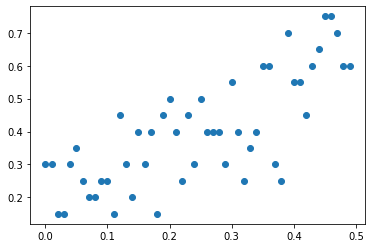

In [7]:
universe_size = 1000
galaxy_number = 20
initial_type_ratios = np.arange(0, 0.5, 0.01)
time_step = 0.05
time_max = 120

ellip_fractions = [simulate_ratio(universe_size, galaxy_number, i, time_step, time_max) for i in initial_type_ratios]

plt.scatter(initial_type_ratios, ellip_fractions)
plt.show()